In [1]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
#print(loompy.__version__)
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.3 umap==0.3.10 numpy==1.17.0 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.23.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [4]:
sc.settings.set_figure_params(dpi=80, frameon=False,fontsize=10,dpi_save=300,format='pdf')  # low dpi (dots per inch) yields small inline figures
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

In [10]:
## read loom file for first time, next time, load h5ad file

#adata=sc.read_loom('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/pfc.bar.sub.loom')

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/loompy/loom_layer.py:123: RuntimeWarning: invalid value encountered in not_equal
  nonzeros = np.where(vals != 0)


In [11]:
results_file = './write/pfc.bar.sub.h5ad'
adata.write(results_file) 

... storing 'ClusterName' as categorical
... storing 'Phase' as categorical
... storing 'binary' as categorical
... storing 'facs' as categorical
... storing 'old_ident' as categorical
... storing 'orig_ident' as categorical
... storing 'sample' as categorical


In [5]:
adata=sc.read_h5ad('./write/pfc.bar.sub.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 3556 × 18421
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'binary', 'facs', 'nCount_RNA', 'nCount_bar', 'nFeature_RNA', 'nFeature_bar', 'old_ident', 'orig_ident', 'percent_mt', 'percent_rp', 'sample'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    obsm: 'pca_cell_embeddings', 'tsne_cell_embeddings', 'umap_cell_embeddings'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

In [7]:
adata.obsm['X_pca']=adata.obsm['pca_cell_embeddings']

In [8]:
with open('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/top10_degs.txt', 'r') as f:
    degs = f.read().splitlines()

... storing 'vst_variable' as categorical
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


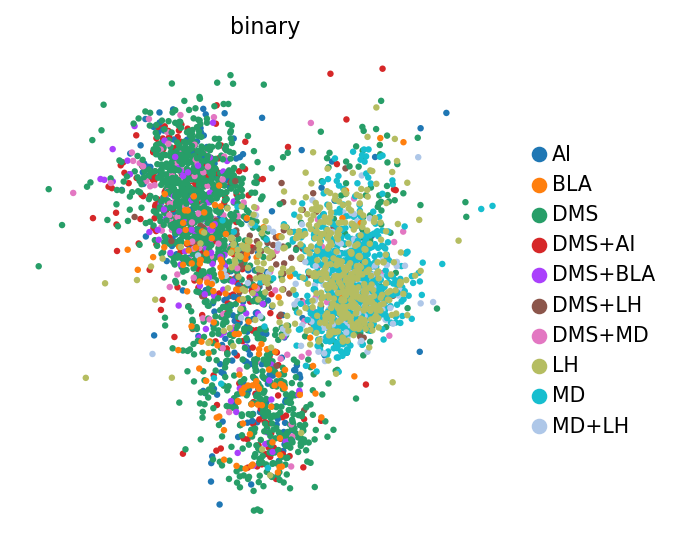

In [9]:
sc.pl.pca(adata,color='binary')

In [10]:
adata.obs['binary'].cat.categories

Index(['AI', 'BLA', 'DMS', 'DMS+AI', 'DMS+BLA', 'DMS+LH', 'DMS+MD', 'LH', 'MD',
       'MD+LH'],
      dtype='object')

In [11]:
adata.obs['binary'].cat.reorder_categories(["DMS+MD","DMS+BLA","DMS+LH" ,"MD+LH","DMS+AI","LH","BLA","MD","DMS","AI"], inplace = True)

In [12]:
adata.uns['binary_colors']=["#FAD510","#ED0000FF","#42B540FF","#0099B4FF","#9986A5",
          "#FDAF91FF","#CCBA72","#ADB6B6FF","#5050FFFF",'#ABDDDE']

In [13]:
sc.tl.dendrogram(adata,var_names=degs,groupby='binary')

Storing dendrogram info using `.uns['dendrogram_binary']`


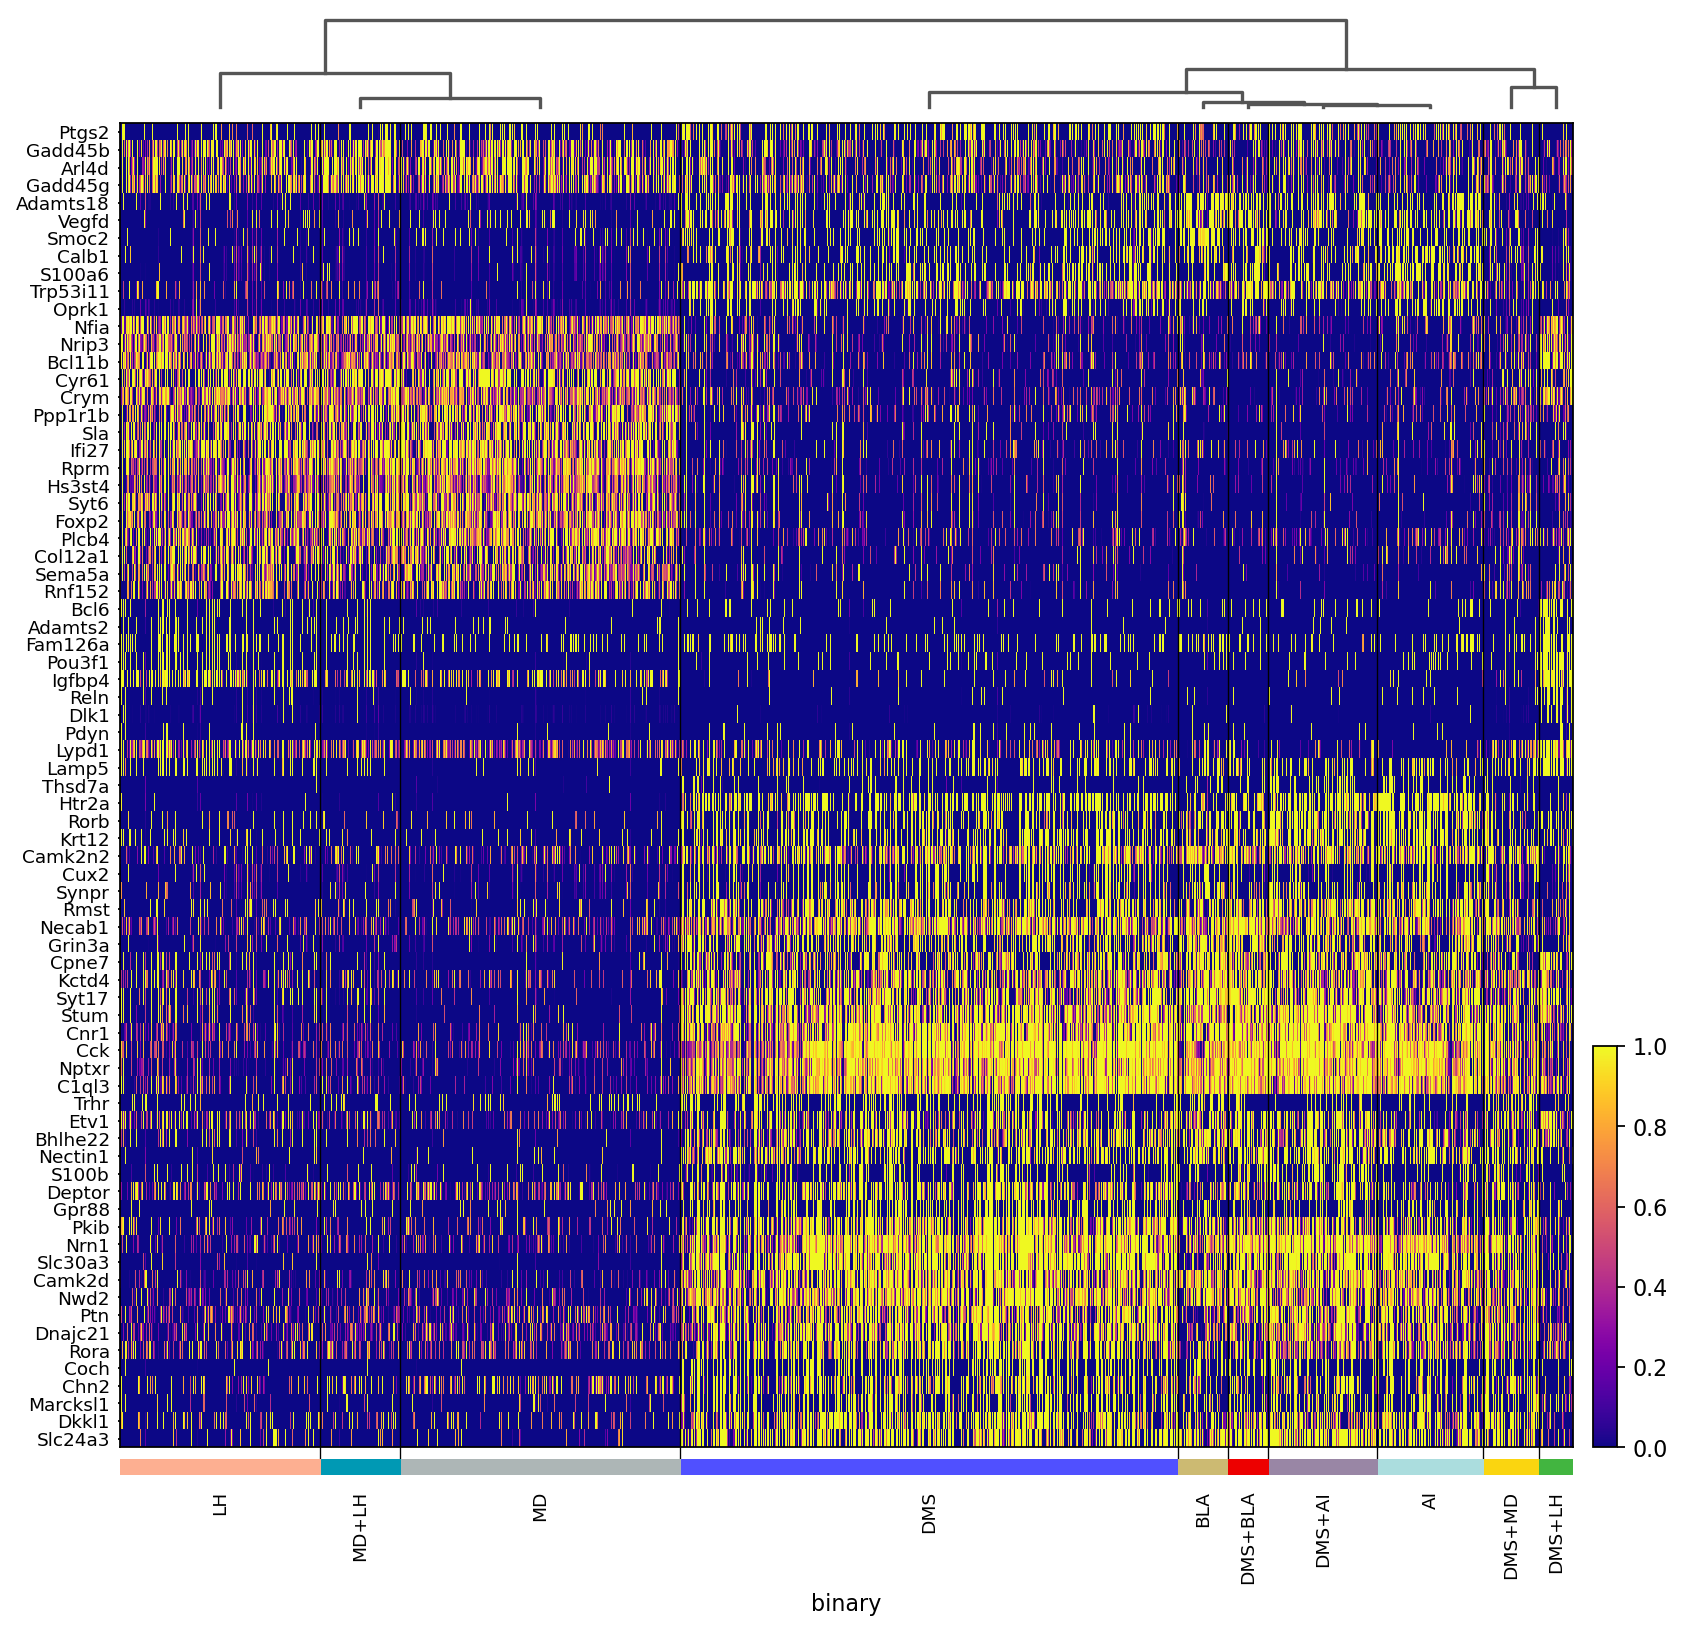

In [34]:
ax = sc.pl.heatmap(adata,degs,figsize=(12,12),
                   vmin=0, vmax=1,cmap='plasma',dendrogram=True,show_gene_labels=True,swap_axes=True,var_group_rotation=45,#p
                   groupby='binary',layer='scale_data',save=' top100 deg same color with pca.pdf'
                  )#

In [14]:
proj_sub_1=adata[adata.obs['binary'].isin(['DMS','LH','DMS+LH'])].copy()

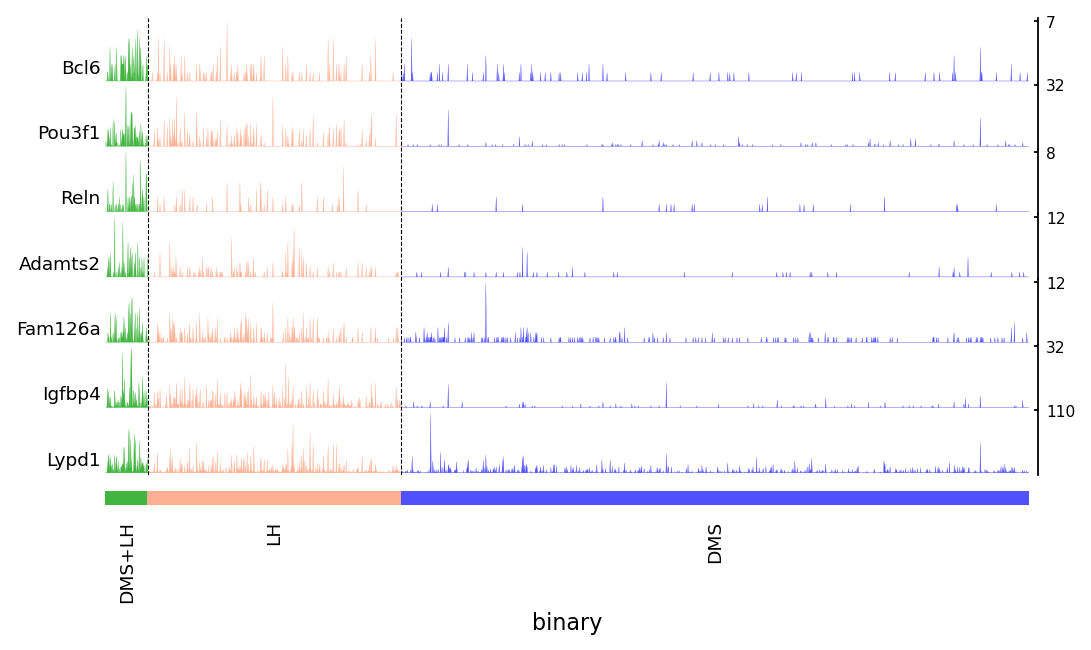

In [27]:
marker_genes=['Bcl6','Pou3f1','Reln','Adamts2','Fam126a','Igfbp4','Lypd1',
              #'Scube1','Pou3f1'
             #'Cck','Marcksl1','Cux1','Satb2','Tbr1'
             ]

    
ax = sc.pl.tracksplot(proj_sub_1,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      save='DMS+LH specific genes.pdf'
                     )

In [28]:
proj_sub_2=adata[adata.obs['binary'].isin(['DMS','BLA','DMS+BLA'])].copy()

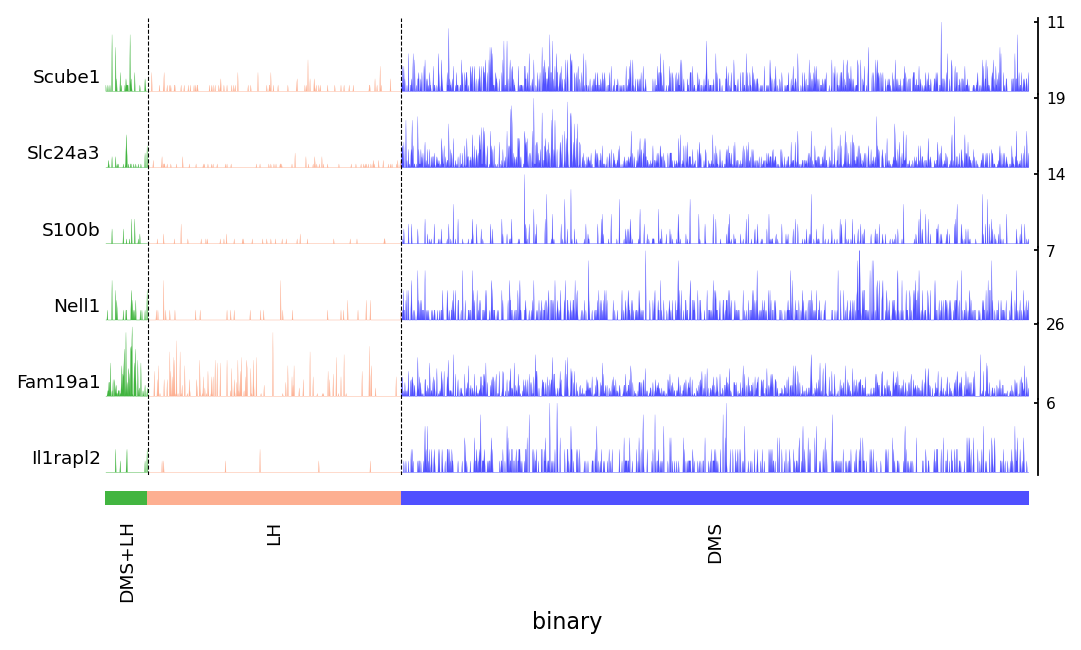

In [29]:
marker_genes=['Scube1','Slc24a3','S100b','Nell1','Fam19a1','Il1rapl2'
             
             ]

    
ax = sc.pl.tracksplot(proj_sub_1,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      #save='DMS+LH specific genes.pdf'
                     )
